In [1]:
from IPython.display import Image


* 어떤 데이터 표현
* 어떤 알고리즘을 적용할지
***
* 문제의 크기는 무엇에 지배되는지
* 어떤 제약이 존재하는지

cf. [Programmers Link](https://programmers.co.kr/learn/courses/9877)

1. Hash - 완주하지 못한 선수
2. Greedy - 체육복
3. Sort - 가장 큰 수
4. Greedy - 큰 수 만들기
5. Heap - 더 맵게
6. DynamicProgramming : N으로 표현
7. DFS/BFS : 여행경로

# Hash - 완주하지 못한 선수 

[Programmers](https://programmers.co.kr/learn/courses/30/lessons/42576)

- 문제 설명   

수많은 마라톤 선수들이 마라톤에 참여하였습니다. 단 한 명의 선수를 제외하고는 모든 선수가 마라톤을 완주하였습니다.

마라톤에 참여한 선수들의 이름이 담긴 배열 participant와 완주한 선수들의 이름이 담긴 배열 completion이 주어질 때, 완주하지 못한 선수의 이름을 return 하도록 solution 함수를 작성해주세요.

- 제한사항   

    - 마라톤 경기에 참여한 선수의 수는 1명 이상 ***100,000***명 이하입니다.
        - participant 배열의 길이는 100,000 이하
        - N or NlogN 의 알고리즘을 찾아야 함
        <br><br>
    - completion의 길이는 participant의 길이보다 1 작습니다.
        - completion 의 길이는 participant 의 길이보다 1 작음
        <br><br>
    - 참가자의 이름은 1개 이상 20개 이하의 알파벳 소문자로 이루어져 있습니다.
        <br><br>
    - 참가자 중에는 ***동명이인***이 있을 수 있습니다.
        - 동명이인이 없다면 집합으로 보고, 차집합을 구하면 되는 문제

***
- 풀이
    - 동명이인 조건 조심!
        - 참가자 목록에서 특정 참가자 등장 횟수 vs 완주자 목록에서의 특정 참가자 등장 횟수
        - 이름에 대해 어떤 수를 저장할 수 있는 데이터 구조 필요 ==> Hash
***        
- 자료구조(&알고리즘)의 선택
    - 만약 이름 대신 번호가 주어졌다면?
        - 선형 배열 (linear array) : 1번 선수의 완주 여부, 2번 선수의 완주 여부 저장
        - But, 이름으로 주어졌기 때문에 가능한 모든 소문자의 조합의 수만큼의 배열의 크기 필요함
        -  (등장할 수 있는 모든 이름을 사전 순서대로 나열하고 이 각각에 대응하는 인덱스를 이용하여 해당 이름이 등장한 회수를 기록해야 함)
        
    - ***번호 말고 다른것(ex. 문자열)로 접근할 수 있는 좋은 자료구조는?***
        - ***Hash*** 
            - *해시 테이블을 이용하여 원하는 기능 (문자열을 키로 해서 상수 시간에 접근이 가능한 기억 공간을 마련) 을 제공한다는 것이 이 풀이에서의 핵심*
            - Key : 배열의 index 대신 key 로 원소에 접근
            - Hash Function
            - Hash Bucket
            
            - 만약 서로 다른 key 가 같은 hash bucket 에 할당되는 경우 --> 충돌 collision
                - sol : 같은 hash buket 에 값을 연달아 저장
               
           



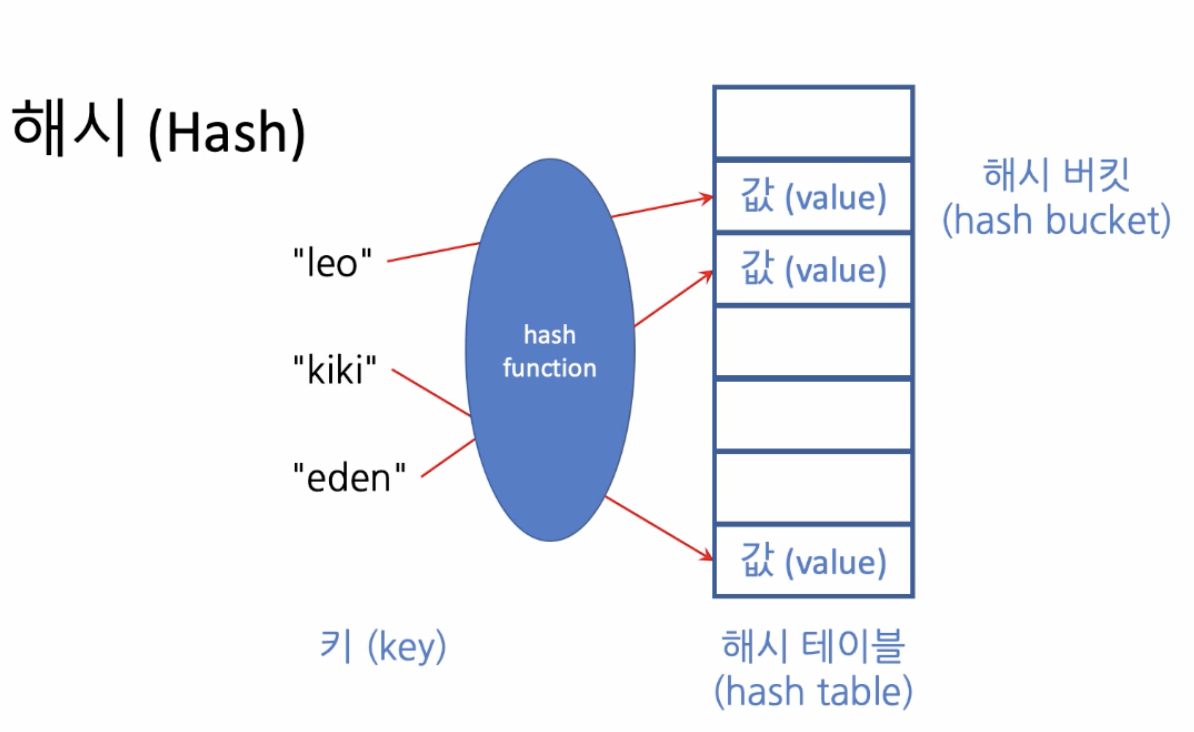

In [2]:
Image("../../img/programmers_Hash_basic.png")

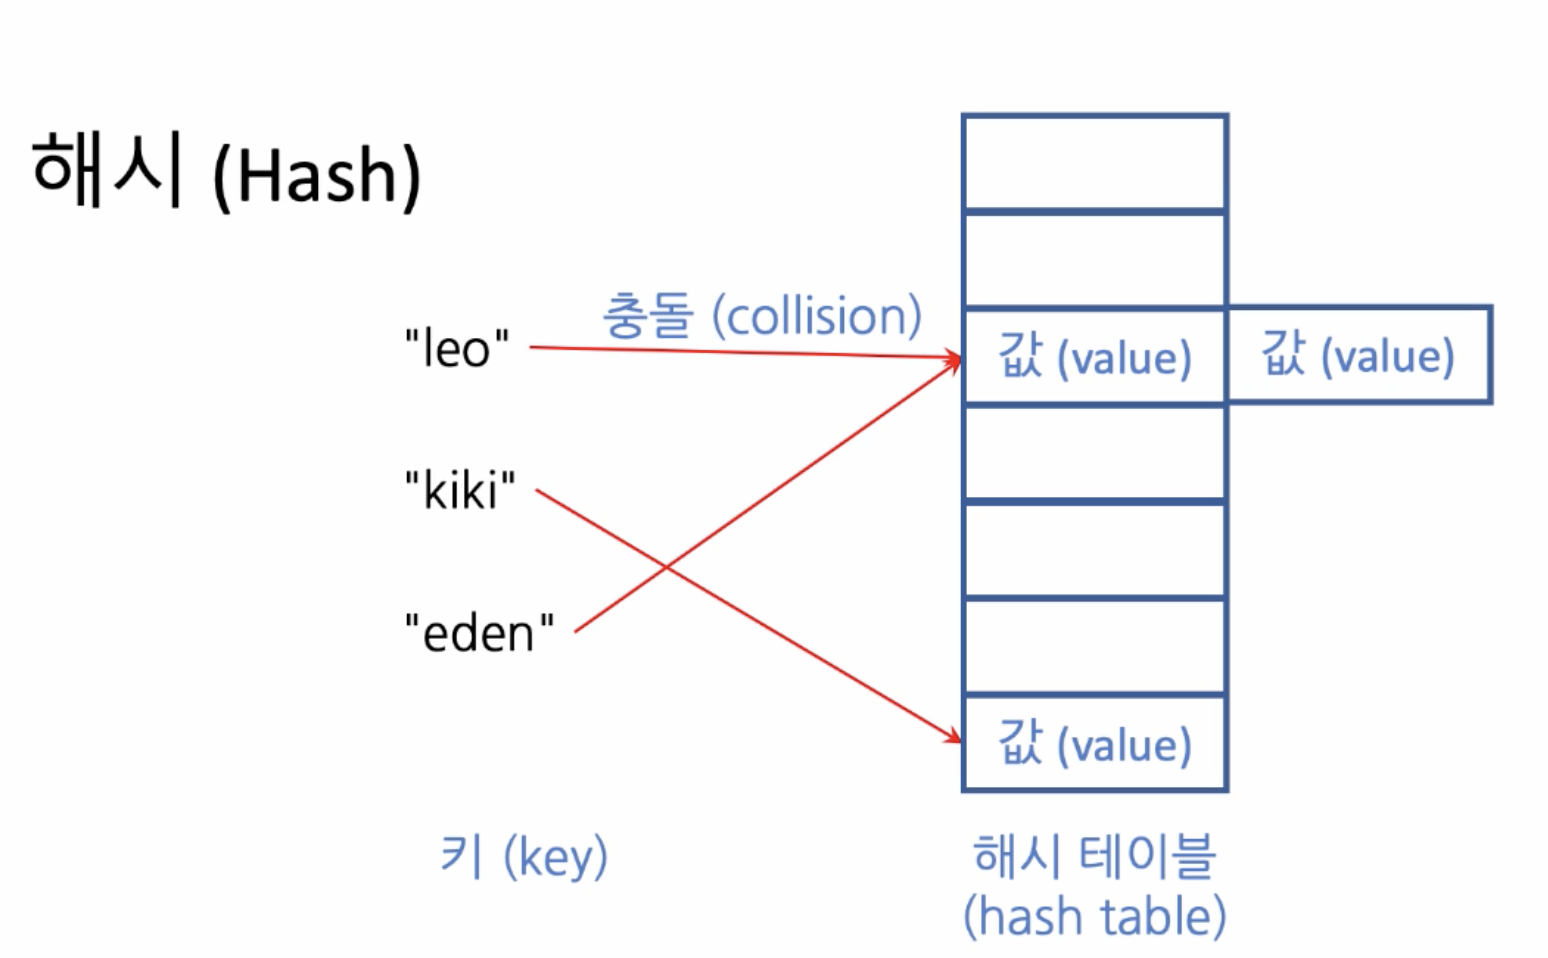

In [3]:
# Hash collision 발생시 해결 방법
Image("../../img/programmers_Hash_collision.png") # code안에서 나오게 할 때

## Python Dictionary
- python 의 dictionary 는 내부적으로 Hash table 을 이용하기 때문에
- dict 의 원소들을 해시를 이용해 O(1) 시간에 접근 가능

***
- x 라는 키가 존재하지 않을 때 값 할당 방법
    - d[x] = d.get(x, 0) + 1
***
O(n)의 복잡도

In [6]:
def solution(participant, completion):
    answer = ''
    d = {}
    
    # 시간복잡도 : 1st for loop ==> O(N)
    for x in participant:
        d[x] = d.get(x, 0) + 1 # 상수시간
    
    # 시간복잡도 : 2nd for loop ==> O(N-1)
    for x in completion:
        d[x] -= 1
        
    # 시간복잡도 : list comprehension ==> O(length of unique name)
    dnf = [k for k, v in d.items() if v != 0]
    answer = dnf[0]
    
    return answer

## 정렬

- participant, completion 을 알파벳 순서로 정렬
    - 같은 이름 중, participant 엔 있고 completion 엔 없을 때 차이가 발생
    - 앞에서부터 비교해 나가면서 다른 것 찾으면 됨
    
***
O(nlogn) 의 복잡도...

In [8]:
def solution(participant, completion):
    participant.sort() # O(nlogn)
    completion.sort() # O(nlogn)
    
    for i in range(len(completion)):
        if participant[i] != completion[i]:
            return participant[i]

    return participant[-1]

## Collections

In [ ]:
import collections

def solution(participant, completion):
    answer = ''
    p_count = collections.Counter(participant)
    c_count = collections.Counter(completion)

    for key, value in p_count.items():
        if c_count[key] != value:
            answer = key
            break
            
   
    return answer

In [9]:
participant = ["mislav", "stanko", "mislav", "ana"]
completion = ["stanko", "ana", "mislav"]

solution(participant, completion)

'mislav'

# Greedy - 체육복

[Programmers](https://programmers.co.kr/learn/courses/9877/lessons/55763)

점심시간에 도둑이 들어, 일부 학생이 체육복을 도난당했습니다. 다행히 여벌 체육복이 있는 학생이 이들에게 체육복을 빌려주려 합니다. 학생들의 번호는 체격 순으로 매겨져 있어, **바로 앞번호의 학생이나 바로 뒷번호의 학생에게만 체육복을 빌려줄 수 있습니다**. 예를 들어, 4번 학생은 3번 학생이나 5번 학생에게만 체육복을 빌려줄 수 있습니다. 체육복이 없으면 수업을 들을 수 없기 때문에 체육복을 적절히 빌려 **최대한 많은 학생**이 체육수업을 들어야 합니다.

전체 학생의 수 n, 체육복을 도난당한 학생들의 번호가 담긴 배열 lost, 여벌의 체육복을 가져온 학생들의 번호가 담긴 배열 reserve가 매개변수로 주어질 때, 체육수업을 들을 수 있는 학생의 최댓값을 return 하도록 solution 함수를 작성해주세요.

***

**Greedy**
- 알고지금의 각 단계에서 그 순간에 최적이라고 생각되는 것을 선택
- greedy 로 최적해를 찾을 수 있는 문제 : 현재의 선택이 마지막 해답의 최적성을 해치지 않을 때

*** 
**Solution 1: Greedy**
- reserve : [2,4,6]
- lost : [1,3,5]
    - 최적 X : 2 --> 3, 4--> 5
    - 최적 O : 2 --> 1, 4--> 3, 6 --> 5
    
- 빌려줄 학생들을 **정해진 순서**로 살펴야 하고, 이 **정해진 순서**에 따라 **우선하여 빌려줄 방향**을 정해야 함
    - <span class="mark">즉,앞의 학생에게 빌려줄 수 있는지 먼저 확인 후 뒤 학생에게 빌려줘야 함</span>

- 학생수는 기껏해야 30!
    - 학생 수만큼 배열을 확보, 각 학생이 갖고 있는 체육복의 수 기록
    - 번호 순서대로 스캔하면서 빌려줄 관계 정한다

***    
**Solution 2**
- 만약 전체 학생 수가 매우 크다면? 그 상황에서 여벌의 체육복을 가져온 학생이 매우 적다면?   
    (ex. 1000만명의 학생, 2명이 여벌이 있는 경우)
    - 여벌의 체육복을 가져온 학생들의 번호 정렬 : O(klogk)
    - 여벌의 체육복을 가져온 학생들만 살펴보면서(전체 학생 수만큼 for loop 을 돌지 않게)
    - 빌려줄 수 있는 다른 학생을 찾아서 처리 (Hash 를 이용해 상수시간에 처리)
    



## Greedy

In [147]:
def solution(n, lost, reserve):
    answer = 0
    students = [1] * (n+2) 
    # 코드 구현의 편의성을 위해 0번째, n+1 번째를 막아두기
    
    for index, s in enumerate(students):
        # 시간복잡도 : 1st for loop ==> O(lost 길이)
        if index in lost:
            students[index] -= 1
            
        # 시간복잡도 : 1st for loop ==> O(reserve 길이)
        if index  in reserve :
            students[index] +=1
    
#     print(students)
    # 시간복잡도 : 1st for loop ==> O(n)
    for index, s in enumerate(students):
        
        if s == 2:
            if students[index-1] == 0:
                students[index-1] += 1
                students[index] -=1
            else:
                if students[index+1] == 0:
                    students[index+1] += 1
                    students[index] -=1
#         print("\n **", index, " : ", students)   

#     print(students)
    answer = sum(i>0 for i in students)

    answer -=2 # 앞서 코드 구현의 편의성을 위해 추가했던 0, n+1 번째 인덱스 값 빼주기
   
    return answer

## Solution2

In [ ]:
def solution(n, lost, reserve):
   

In [148]:
n = 6
lost = [4,6]
reserve = [3,5]

solution(n, lost, reserve)

6

# Sort - 가장 큰 수

[Programmers](https://programmers.co.kr/learn/courses/9877/lessons/55766)

0 또는 양의 정수가 주어졌을 때, 정수를 이어 붙여 만들 수 있는 가장 큰 수를 알아내 주세요.

예를 들어, 주어진 정수가 [6, 10, 2]라면 [6102, 6210, 1062, 1026, 2610, 2106]를 만들 수 있고, 이중 가장 큰 수는 6210입니다.

0 또는 양의 정수가 담긴 배열 numbers가 매개변수로 주어질 때, 순서를 재배치하여 만들 수 있는 가장 큰 수를 문자열로 바꾸어 return 하도록 solution 함수를 작성해주세요.

***
*제한 사항*
- numbers의 길이는 1 이상 100,000 이하입니다.
- numbers의 원소는 0 이상 1,000 이하입니다.
- 정답이 너무 클 수 있으니 문자열로 바꾸어 return 합니다.


***
1. 가장 큰 자리수의 숫자 찾기
2. 해당 숫자가 큰 것부터 나열
3. **만약 숫자가 같으면 (3, 30, 34)?**
***
***Thinking***
* 자리수별로 비교 (10의 자리수끼리, 1의 자리수끼리)
    - int to string ['6', '10', '2']
    - split string by character [['6'], ['1', '0'], ['2']]
    - sorting list.sort(key= lambda l : l[0], reverse = True)
        - [3, 30, 34] 인 경우 문제 발생
    - **custom function** 사용
        - 가장 큰 자리수부터 비교하고, 가장 큰자리수의 숫자가 같으면 그 다음 자리수끼리 비교
    
    (cf. Advanced Sorting : https://medium.com/better-programming/advanced-sorting-in-python-using-lambdas-and-custom-functions-410b5780fb07)



In [79]:
import collections
from functools import cmp_to_key

def digit_comp(a,b): ## JAVA COMPARE 함수와 비슷!
    a_len = len(a)
    b_len = len(b)
    
    if a[0] > b[0]:
        return -1
    elif a[0] == b[0]:
        if a_len == b_len: # 30, 34
            if a[a_len-1] > b[b_len-1]:
                return -1
            elif a[a_len-1] < b[b_len-1]:
                return 1
        elif a_len > b_len: # 34, 3
              if a[a_len-1]   
#         elif a_len < b_len: # 3, 30
            

        else:
            return 0
    else:
        return 1
    
def solution(numbers):
    answer = ''
    digit = []
    for n in numbers:
        digit.append(list(str(n)))
    key_func = cmp_to_key(digit_comp)
    digit.sort(key = key_func)
    print(digit)
   
    return answer

In [80]:
numbers = [3, 30, 34, 5, 9]
solution(numbers)

[['9'], ['5'], ['3'], ['3', '4'], ['3', '0']]


''

## Solution

1) solution1 (ex. [3, 30, 34, 5, 9])
    1. 빈 문자열로 수를 초기화
    2. 가장 크게 만들 수 있는 수를 고른다 : 목록의 길이에 비례 (n)
    3. 그 수를 현재 수에 이어 붙인다 
    4. 모든 수를 다 사용할 때까지 반복 : 주어진 수의 길이만큼 반복 (n)

    --> n^2 의 복잡도

    [3, 30, 34, 5, 9]--""   
    [3, 30, 34, 5]-----"9"  
    [3, 30, 34]--------"95" 
    [3, 30]------------"9534"
    [30]---------------"95343"
    []-----------------"9534330"
    
2) solution2
    1. 빈 문자열로 수를 초기화
    2. ***수의 목록을(크게 만드는 것 우선으로)정렬한다*** (logn)
    3. 목록에서 하나씩 꺼내어 현재 수에 이어 붙인다
    4. 모든 수를 다 사용할 때까지 반복 : 주어진 수의 길이만큼 반복 (n)
    
    ***크게 만드는 수***의 기준
    - 3 vs 32 : 332 > 323 --> 3
    - 3 vs 33 : 333 = 333 --> anything
    - 3 vs 34 : 334 < 343 --> 34
    
    - 34 vs 343 : 34343 > 34334 --> 34
        - 3434 vs 3433 을 비교하면 됨 
<span class="mark">주어진 수는 1000이하라고 했으므로, 주어진 수를 반복했을 때 4자리만 비교</span>

😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱
    
    ** 대소관계 비교를 위한 기준을 마련
    ** 이것을 이용하여 주어진 배열을 정렬
    ** 정렬된 배열을 이용하여 문자열 표현을 완성

In [86]:
def solution(numbers):
    answer = ""
    numbers = [str(x) for x in numbers]
    ## 주어진 수를 반복해서 4자리만 비교 😱😱😱😱😱😱
    numbers.sort(key = lambda x : (x*4)[:4], reverse = True)
    
    ## numbers 의 원소는 0 이상 1000이하!! 
    ##--> 주어진 numbers 가 모두 0 인 경우 예외처리!
    
    if numbers[0] == '0':
        answer = '0'
    else:
        answer = ''.join(numbers)

    return answer

solution(numbers)

'9534330'

# Greedy - 큰 수 만들기

[Programmers](https://programmers.co.kr/learn/courses/9877/lessons/55766)

어떤 숫자에서 k개의 수를 제거했을 때 얻을 수 있는 가장 큰 숫자를 구하려 합니다.

예를 들어, 숫자 1924에서 수 두 개를 제거하면 [19, 12, 14, 92, 94, 24] 를 만들 수 있습니다. 이 중 가장 큰 숫자는 94 입니다.

문자열 형식으로 숫자 number와 제거할 수의 개수 k가 solution 함수의 매개변수로 주어집니다. number에서 k 개의 수를 제거했을 때 만들 수 있는 수 중 가장 큰 숫자를 문자열 형태로 return 하도록 solution 함수를 완성하세요.

제한 조건
- number는 1자리 이상, 1,000,000자리 이하인 숫자입니다.
- k는 1 이상 number의 자릿수 미만인 자연수입니다.

***
***Thinking***
1. 다음번에 올 수와 비교 --> 두 수 중 작은 수 제거 (X)
    : 4177252841 에서 예외 발생 (775284)
    
2. 지워야할 수의 개수(k)만큼 수를 묶어서 보자 + 묶인 수 중 최소값을 지운다?단,먼저 나온것부터

    1) 4177252841	[0:4] 
        - (4177)252841 del[1] 
        - (4772)52841  del[2]
        - (4775)2841   del[4]
        - (7752)841    del[2] ==> 775841
    2) 1231234 [0:3]
        - (123)1234 del[1]
        - (231)234 del[1]
        - (23234) del[2] ==> 3234
        
*** 
테스트 케이스 실패..ㅜ😰😰   
ex) "98765" k = 2
  

    
    



In [262]:
import numpy as np

def solution(number, k):
    answer = ""
    numbers = [int(x) for x in number]
    end_idx = k
    while k > 0:
        min_idx = np.argmin(numbers[0:end_idx])
        min_value = np.argmin(numbers[0:end_idx])
        print(numbers, numbers[0:4], min_idx, min_value)
        
        del numbers[min_idx]
        k -= 1
        
    numbers = [str(x) for x in numbers]
    answer = "".join(numbers)
    return answer

In [264]:
number = "1231234"
k = 3

solution(number, k)

[1, 2, 3, 1, 2, 3, 4] [1, 2, 3, 1] 0 0
[2, 3, 1, 2, 3, 4] [2, 3, 1, 2] 2 2
[2, 3, 2, 3, 4] [2, 3, 2, 3] 0 0


'3234'

## Solution

* 큰 수 만들기 
    - 앞 자리에 큰 수가 오는 것이 전체를 크게 만든다
        --> 따라서 큰 것을 우선해서 골라 담고 싶다
    - 앞 자리에서부터 하나씩 골라서 담되
    - **지금 담으려는 것보다 작은것들은 도로 뺀다**
    - 단, 뺄 수 있는 수효에 도달할때까지만
<br><br>   
- number = "4177252841" k = 4
    [4]   
    [4, 1]   
    [4, 7] -1, [7] -4   
    [7, 7]   
    [7, 7, 2]   
    [7, 7, 5] -2   
    [7, 7, 5, 2]   
    [7, 7, 5, 8] -2   
<br><br>   
***
**Solution**
1. 가장 단순한 방법 : 모든 조합 살펴보는 것
2. O(n)
    - 주어진숫자(number)로부터 하나씩 꺼내어 모으되 
        - 이 때, 이미 모아둔 것 중 지금 등장한 것보다 작은 것들은 빼낸다
        - **이것은 어디서 어떻게 살펴볼것인지?**
    - 이렇게 모은 숫자들을 자릿수 맞추어 반환
        - 아직 뺄 개수(K)를 채우지 못한 경우
        - **이때 자릿누는 어떻게 계산?**
    - 탐욕법(Greedy Approach)
        - 앞 단계에서의 선택 (앞 자리에 큰수!)이 이후 단계에서의 동작에 의한 해 (solution)의 최적성 (optimality)에 영향을 주지 않음




In [282]:
def solution(number, k):
    collected = [] # 숫자를 모으기 위한 빈 리스트 (문자열은 immutable 하기 때문에 리스트로!)
    
    # (n) 회 반복
    for i, num in enumerate(number): 
        
        # (n아님!, 많아야 2) 이중순환문, but 하나의 수는 collected 에 들어갔다가 나오는게 최악의 case 이기 때문에
        while len(collected) > 0 and collected[-1] < num and k > 0:
            """
            # len(collected) > 0   :collected 리스트에 원소가 하나 이상 있고
            # collected[-1] < num  :마지막 원소가 지금 담으려는 숫자인 Num보다 작고
            # k > 0                :개수가 아직 남아 있을 때
            
            # 지금까지 이러한 원칙에 따랏다면 내림차순으로 되어 있을거기 때문에 마지막 숫자만 확인하면 된다!
            # collected[-1] 은 하나의 문자, num 도 하나의 문자 --> 정수로 바꿔주지 않아도 됨
            ## python 에서 문자의 대소관계는 알파벳의 순서(사전순서)에 따르기 때문에 수의 크기 대소관계와 같다 
            ## (단, 길이가 2 이상이면 조금 다름)
            """
            collected.pop()
            k -= 1
            
        # 남아있는 부분을 이어 붙이기
        if k == 0:
            collected += list(number[i:]) 
            break
        
        collected.append(num)

    
    # 만약 K개만큼 다 빠지지 않았을 때
    collected = collected[:-k] if k>0 else collected
    answer = ''.join(collected)         
    return answer    


In [283]:
number = "4177252841"
k = 4

solution(number, k)

'775841'

# 😱Heap - 더 맵게

[Programmers](https://programmers.co.kr/learn/courses/9877/lessons/55762)

매운 것을 좋아하는 Leo는 모든 음식의 스코빌 지수를 K 이상으로 만들고 싶습니다. 모든 음식의 스코빌 지수를 K 이상으로 만들기 위해 Leo는 스코빌 지수가 가장 낮은 두 개의 음식을 아래와 같이 특별한 방법으로 섞어 새로운 음식을 만듭니다.

**섞은 음식의 스코빌 지수 = 가장 맵지 않은 음식의 스코빌 지수 + (두 번째로 맵지 않은 음식의 스코빌 지수 * 2)**

Leo는 모든 음식의 스코빌 지수가 K 이상이 될 때까지 반복하여 섞습니다.
Leo가 가진 음식의 스코빌 지수를 담은 배열 scoville과 원하는 스코빌 지수 K가 주어질 때, 모든 음식의 스코빌 지수를 K 이상으로 만들기 위해 섞어야 하는 최소 횟수를 return 하도록 solution 함수를 작성해주세요.

- 제한 사항
    - scoville의 길이는 1 이상 1,000,000 이하입니다.
    - K는 0 이상 1,000,000,000 이하입니다.
    - scoville의 원소는 각각 0 이상 1,000,000 이하입니다.
    - 모든 음식의 스코빌 지수를 K 이상으로 만들 수 없는 경우에는 -1을 return 합니다

***
**Thinking**
- 음식 섞기하려면 주어진 scoville 를 정렬할 상태에서 가장 작은 수, 두번째로 작은 수 찾아야 함
- scoville 의 값, K 의 값이 매우 클 수 있음..흠
- ex. [1, 1, 1, 1, 1], K = 1000 이면 불가능

👩‍💻
- 먼저 가능 여부 확인해야 하나? 
    - 주어진 배열에서 K 보다 작은 수로 만들 수 있는 최대값 찾아서?
    - 어차피 최대값 찾으려면 for 문 돌면서 앞에서 계산된 값 * 2 해줘야 하니까...최대값 먼저 찾기보단 그냥 for 문 돌면서 순차적으로 계산
- 순차적으로 돌면서, 음식을 섞으면 배열에서 두개씩 빠지는 구조..그럼 for 문을 돌면서 배열이 바뀌게 되는데..
    


***
- Worst Case 
    - 수가 하나 남을 때까지 섞어야 하는 경우 (n-1회)
    - 각 단계(섞기)에서 요구되는 계산량 : 정렬된 리스트에 순서 맞추어 원소 삽입 
        - O(n)
    - 전체 알고리즘 복잡도 = O(n^2)
    

- 최소/최대 원소를 빠르게 꺼낼 수 있으면 좋겠다! ==> **Heap**
    - [Heap 이란?](https://gmlwjd9405.github.io/2018/05/10/data-structure-heap.html)
    - 힙은 트리의 일종
    - 우선 순위 큐를 위하여 만들어진 자료구조
    - <span class="mark">***최대값, 최소값을 쉽게 추출할 수 있는 자료구조***</span>
    - 내림차순 정렬을 위해서는 최대 힙을 구성하고 오름차순 정렬을 위해서는 최소 힙을 구성
        - max heap : 부모 노드의 키 값이 항상 자식 노드의 키 값보다 크거나 같은 완전 이진 트리
            - key(부모 노드) >= key(자식 노드)
        - min heap
            - key(부모 노드) <= key(자식 노드)
   
    - 연산 
        - 힙 구성 (heapify) : O(NlogN)
        - 삽입 (insert) : O(logN)
        - 삭제 (remove) : O(logN)
    - Heap 응용
        - [Heap sort](https://gmlwjd9405.github.io/2018/05/10/algorithm-heap-sort.html)
        - 우선순위 큐
        


## Solution

***
- Python 에서 heap 적용
    - import heapq
    - heapq.heapify(L) : 리스트 L 로부터 min heap 구성
    - m = heapq.heappop(L) : min heap L 에서 최소값 삭제 & 반환
    - heapq.heappush(L, x) : min heap L 에 원소 x 삽입 (삽입 후에도 min heap 구조 유지)

In [42]:
import heapq

"""
Heap : O(nLogN)
List : O(N^2)
"""
def solution(scoville, K):
    answer = 0
    heapq.heapify(scoville)
    print("after heapify", scoville)
    
    # 음식 섞기
    
    ### 최대 n-1번 반복
    while True: 
        
        # 음식 섞기의 중단 조건
        ## 1. 모든 음식의 scovile 점수가 K 이상
        ## 2. 모든 음식의 스코빌 지수를 K 이상으로 만들 수 없는 경우
        
        ## logN
        min1 = heapq.heappop(scoville) # minheap 의 최소값
        print("after heappop", scoville)
        if min1 >= K:
            break
        elif len(scoville) == 0:
            answer = -1
            break
        
        ## logN
        min2 = heapq.heappop(scoville)    
        new_scoville = min1 + 2*min2
        
        heapq.heappush(scoville, new_scoville)
        answer += 1

    return answer



In [40]:
scoville = [1, 2, 3, 9, 10, 12]
K = 7

solution(scoville, K)

after heapify [1, 2, 3, 9, 10, 12]
after heappop [2, 9, 3, 12, 10]
after heappop [5, 9, 10, 12]
after heappop [10, 12, 13]


2

# 😱DP - N으로 표현

[Programmers](https://programmers.co.kr/learn/courses/9877/lessons/55768)

문제 설명
아래와 같이 5와 사칙연산만으로 12를 표현할 수 있습니다.

12 = 5 + 5 + (5 / 5) + (5 / 5)   
12 = 55 / 5 + 5 / 5   
12 = (55 + 5) / 5   

5를 사용한 횟수는 각각 6,5,4 입니다. 그리고 이중 가장 작은 경우는 4입니다.
이처럼 숫자 N과 number가 주어질 때, N과 사칙연산만 사용해서 표현 할 수 있는 방법 중 N 사용횟수의 최솟값을 return 하도록 solution 함수를 작성하세요.

제한사항
- N은 1 이상 9 이하입니다.
- number는 1 이상 32,000 이하입니다.
- 수식에는 괄호와 사칙연산만 가능하며 나누기 연산에서 나머지는 무시합니다.
- 최솟값이 8보다 크면 -1을 return 합니다



***
**Thinking**

* 동적 프로그래밍 - Bottom Up

: 어떤 문제가 반복적이고 최적 하위구조로 이루어질때,  하위구조에 있는 부분 문제의 답을 기반으로 전체 문제의 답을 구하는 방법

- N 이 한개일때, 두개일때, 세개일때...로 차근차근 수를 늘려가며 푸는 방법?
    - ? 각 단계에서 가능 여부를 어떻게 판단하나..
    
    1) 12 vs [5]
        - 5
        - (5
            - 왼쪽 괄호를 쓰면, 닫는 괄호를 언제 사용하냐에 따라 경우의수 too many..😱
            
    2) 12 vs [5, 5]
        - 5를 하나씩 더 쓸 때마다 가능한 사칙연산의 경우
            - 5+5, 5-5
            - 5/5, 5*5
            - 5)+5, 5)-5, 5)*5, 5)/5
            - 55
            - 괄호가 맨 앞에 있을 때..

    3) 12 vs [5, 5, 5]
        - 5+5+5, 5+5-5, 5+5/5, 5+5*5, 5+5)+5, 5+5)-5, 5+5)*5, 5+5)/5
        - 5-5+5, ...
        
- N 이 8개일 때부터 줄여가기?  
    - *조건 : 최솟값이 8보다 크면 -1을 return 합니다*
    
    
    


**Dynamic Programming**
: 문제의 답인지를 확인하기 위해 탐색하기 위한 범위 (solution space)를 진전하면서 동적으로 결정하는 프로그래밍

- 주어진 최적화 문제를
    - 재귀적인 방식으로 보다 작은 부분 문제로 나누어
    - 부분 문제를 풀어, 이 해를 조합하여
    - 전체 문제의 해답에 이르는 방식
    
    
- 알고리즘의 진행에 따라 탐색해야 할 범위를 동적으로 결정함으로써 탐색 범위를 한정


- 적용 예시
    - 피보나치 수열 
        - 재귀함수로 구현한다면? ==> 복잡도가 지수함수
        - 동적 계획법을 적용한다면? ==> 복잡도가 선형함수
            - 부분 문제를 품 : f(0) = 0, f(1) = 1
            - 이전에 푼 부분 문제를 활용 : f(2) = f(1) + f(0)
    
    - Knapsack Problem : 가장 높은 값을 가지도록 물건들을 골라 배낭에 담으시오  
    
*** 
## Solution
1. N 1개로 만들 수 있는 수
    - 5
2. N 2개로 만들 수 있는 수
    - NN, 
        - 5
    - N +-*/ N
        - 10, 0, 25, 1
3. N 3개로 만들 수 있는 수
    - NNN 
        - 555
    - (N **2**개로 만들수 있는 수) +-\*/ (N **1**개로 만들 수 있는 수)
    - (N **1**개로 만들수 있는 수) +-\*/ (N **2**개로 만들 수 있는 수)


**괄호사용은 별 문제 없음**
   
   
**cf. for-else 문**

for와 함께 쓰는 else는, for문이 중간에 break 등으로 끊기지 않고, 끝까지 수행 되었을 때 수행하는 코드를 담고 있습니다.


In [55]:
def solution(N, number):
    answer = 0
    # 중복을 허용하지 않고 수를 모으고 싶다
    # [(N 1개로 만들 수 있는 수), (N 2개로 만들 수 있는 수)]
    s = [set() for x in range(8)]
    
    # 각각의 set 에 N, NN, NNN, NNN 넣어놓기
    for i, x in enumerate(s, start=1):
        x.add(int(str(N)*i))
    
    # 사칙연산 '조합' 구하기 
    for i in range(1, len(s)):
#         print("**************index : ", i)
        
        # 😱😱😱😱😱조합 😱😱😱😱😱  
        ## i=1일 땐 (s[0] +-/* s[1]), (s[1] +-/* s[0])
        ## i=2일 땐 (s[2] +-/* s[1]), (s[1] +-/* s[2]), (s[1] +-/* s[1])
        for j in range(i): 
            
#             print("i & j", i, j)
#             print("s[]", s)
#             print("s[j]", s[j])
#             print("s[i-j-1]", s[i-j-1])
#             print("\n######", j , " +-*/", i-j-1)
            
            for op1 in s[j]: # 앞 연산자
                for op2 in s[i - j - 1]: # 뒤 연산자
                    s[i].add(op1 + op2)
                    s[i].add(op1 - op2)
                    s[i].add(op1 * op2)
                    if op2 != 0:
                        s[i].add(op1 // op2)
#             print("After For Loop ---> s[]", s, "\n")
        if number in s[i]:
            answer = i+1
            break
    ## for-else 문 
    #: for와 함께 쓰는 else는, for문이 중간에 break 등으로 끊기지 않고, 끝까지 수행 되었을 때 수행하는 코드를 담고 있습니다.

    else:
        answer = -1
            
   
     
    
    return answer

In [56]:
N = 5
number = 12
solution(N, number)

4

# DFS/BFS - 여행경로

[Programmers](https://programmers.co.kr/learn/courses/9877/lessons/55767)

**문제 설명**

주어진 항공권을 모두 이용하여 여행경로를 짜려고 합니다. 항상 ICN 공항에서 출발합니다.

항공권 정보가 담긴 2차원 배열 tickets가 매개변수로 주어질 때, 방문하는 공항 경로를 배열에 담아 return 하도록 solution 함수를 작성해주세요.

**제한사항**

- 모든 공항은 알파벳 대문자 3글자로 이루어집니다.   
- 주어진 공항 수는 3개 이상 10,000개 이하입니다.   
- tickets의 각 행 [a, b]는 a 공항에서 b 공항으로 가는 항공권이 있다는 의미입니다.
- 주어진 항공권은 모두 사용해야 합니다.
- **만일 가능한 경로가 2개 이상일 경우 알파벳 순서가 앞서는 경로를 return 합니다.**
- 모든 도시를 방문할 수 없는 경우는 주어지지 않습니다.

**입출력 예**
tickets, 	return

[[ICN, JFK], [HND, IAD], [JFK, HND]]	[ICN, JFK, HND, IAD]

[[ICN, SFO], [ICN, ATL], [SFO, ATL], [ATL, ICN], [ATL,SFO]]	[ICN, ATL, ICN, SFO, ATL, SFO]

In [134]:
import collections

def generate_graph(connections):
    graph = {}
    for con in connections:
        # sorting: 만일 가능한 경로가 2개 이상일 경우 알파벳 순서가 앞서는 경로를 return 합니다.
        # [0] -> [1] 경로만 가능
        graph[con[0]] = sorted([con[1]] if con[0] not in graph else graph[con[0]] + [con[1],])
    
#     print("Graph", graph)
    return graph

def dfs(graph, root):
    visited = []
    stack = [root]
    
    while stack:
        city = stack.pop()
        if city not in visited:
            visited.append(city)
            stack += set(graph[city]) - set(visited)
    return visited


def bfs(graph, root):
    visited = []
    queue = collections.deque([root])
    start = root

    
    while queue:
        city = queue.popleft()
#         print("\n city", city)
        # if city not in visited: ## 방문한 곳을 다시 방문하는 경우도 있음!
        
        visited.append(city)
        
        if city in graph.keys():
            queue = collections.deque(sorted(set(graph[city])))
#             print(queue)
        if start != city:
            graph[start].remove(city)
        start = city
#         print(graph)
#         print(visited)
 


    return visited

def solution(tickets):
    answer = []
    graph= generate_graph(tickets)
    answer = bfs(graph, tickets[0][0])
    return answer

In [136]:
tickets = [["ICN", "JFK"], ["HND", "IAD"], ["JFK", "HND"]]
# tickets = [["ICN", "SFO"], ["ICN", "ATL"], ["SFO", "ATL"], ["ATL", "ICN"], ["ATL","SFO"]]
solution(tickets)


Graph {'ICN': ['JFK'], 'HND': ['IAD'], 'JFK': ['HND']}


['ICN', 'JFK', 'HND', 'IAD']

## Solutions

- Graph
    - vertex, edge
    - directed or undirected
- Stack, Queue 

`DFS (Depth-First Search)`    
한 정점에서 인접한 모든 정점을 방문하되, 각 인접 정점을 기준으로 깊이 우선 탐색을 끝낸 후 다음 정점으로 진행   
: **Stack** 을 이용해 어느 정점에서 DFS 하고 있는지 기억하고 되돌아감
   
`BFS (Breadth-First Search)`   
한 정점에서 인접한 모든 정점을 방문하되, 방문한 각 인접 정점을 기준으로(방문한 순서에 따라) 또다시 너비 우선 탐색을 진행   
: **Queue** 를 이용해 어느 정점에서 BFS 해야 하는지 기록하고 진행

***

`** 여행경로 : DFS 응용 문제**`
- 한붓그리기
   - 한붓그리기가 가능함은 문제에서 보장되어 있음
- 시작 정점은 언제나 ICN
- **모든 정점 방문이 아니라 모든 간선을 거쳐야 함**
    - 언젠가는 한 번 가야 하는데, 그 순서를 결정하라
- 한 정점에서 택할 수 있는 간선이 2개 이상인 경우, 알파벳 순서로

***

**알고리즘 설계**
- stack 을 이용해 재귀적인 한붓그리기 문제 해결

In [153]:
def solution(tickets):
    routes = {}
    
    # Graph 만들기 
    # 사전을 이용하여 각 공항에서 출발하는 항공권의 집합 or 리스트로 표현
    # 알파벳 순으로 해야 하니까, 리스트로! 
    
    for t in tickets:
        routes[t[0]] = routes.get(t[0], []) + [t[1]]

    # Sorting (C - B - A 순으로 ,,stack이여서 뒤에서부터 뺄거니까!)
    # 리스트는 뒤에 있는 원소부터 빼는게 효율적이니까
    for r in routes:
        routes[r].sort(reverse=True)
#     print("Graph", routes)
    stack = ["ICN"] # 시작 정점은 언제나 ICN
    path = []
    
    while len(stack) > 0:
        top = stack[-1]
        # 😱😱
        # top not in routes : top에서 출발하는 표가 한장도 없다면
        # len(routes[top]) == 0 : top에서 출발하는 표가 있지만, 다 썻다면
        if top not in routes or len(routes[top]) == 0:
            path.append(stack.pop())
        else:
            stack.append(routes[top][-1]) # stack의 맨 뒤 요소 빼기
            routes[top] = routes[top][:-1]  # 뺀건 routes에서 빼주기
#         print("\n top", top)
#         print("path", path)
#         print("stack", stack)
#         print("routes", routes)
    #stack 에서 뺀거의 역순
    return path[::-1] 


In [154]:
# tickets = [["ICN", "JFK"], ["HND", "IAD"], ["JFK", "HND"]]
tickets = [["ICN", "SFO"], ["ICN", "ATL"], ["SFO", "ATL"], ["ATL", "ICN"], ["ATL","SFO"]]
solution(tickets)

['ICN', 'ATL', 'ICN', 'SFO', 'ATL', 'SFO']